In [13]:
import numpy as np
from scipy.optimize import minimize

# Define the objective function
def objective_function(x):
    x1, x2 = x
    return (x1 - 3)**2 + (x2 - 3)**2

# Define the constraint
def constraint(x):
    return 5 - (x[0] + x[1])  # x1 + x2 <= 5

# Initial guess
x0 = [0, 0]

# Define the constraints and bounds
constraints = {'type': 'ineq', 'fun': constraint}
bounds = [(0, None), (0, None)]  # x1, x2 >= 0

# Perform the optimization using SLSQP
result_slsqp = minimize(objective_function, x0, method='SLSQP', bounds=bounds, constraints=constraints)
print("SLSQP Result:")
print(result_slsqp)


# Comparison
x_slsqp = result_slsqp.x
f_slsqp = result_slsqp.fun

print(f"SLSQP Solution: x1 = {x_slsqp[0]}, x2 = {x_slsqp[1]}, f(x) = {f_slsqp}")

# # Define the Optuna objective function
# def optuna_objective(trial):
#     x1 = trial.suggest_float('x1', 0, 5)
#     x2 = trial.suggest_float('x2', 0, 5)
    
#     if x1 + x2 > 5:
#         return float('inf')
    
#     return (x1 - 3)**2 + (x2 - 3)**2

# # Perform the optimization using Optuna
# study = optuna.create_study(direction='minimize')
# study.optimize(optuna_objective, n_trials=100)

# print("Optuna Result:")
# print(study.best_trial)
# x_optuna = study.best_trial.params
# f_optuna = study.best_trial.value

#print(f"Optuna Solution: x1 = {x_optuna['x1']}, x2 = {x_optuna['x2']}, f(x) = {f_optuna}")


SLSQP Result:
 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.5000000000000258
       x: [ 2.500e+00  2.500e+00]
     nit: 2
     jac: [-1.000e+00 -1.000e+00]
    nfev: 6
    njev: 2
SLSQP Solution: x1 = 2.499999999999987, x2 = 2.499999999999987, f(x) = 0.5000000000000258


In [28]:
import numpy as np
from scipy.optimize import minimize
import joblib
import warnings # supress warnings
warnings.filterwarnings('ignore')

mass_collect = []
flutter_collect = []

# Define the objective function
def objective_function(x):
    indices1 = [3, 6, 9, 12, 15]
    selected_items1 = [x[i] for i in indices1]

    # Load the fitted model and preprocessing pipelines
    best_multi_svr1 = joblib.load('mass_svr.pkl')
    input_pipeline1 = joblib.load('mass_input_pipeline.pkl')
    output_pipeline1 = joblib.load('mass_output_pipeline.pkl')

    # Transform the input data using the same pipeline
    X_new_scaled = input_pipeline1.transform(np.array(selected_items1).reshape(1, -1))

    # Make predictions using the specific input data
    predictions_scaled = best_multi_svr1.predict(X_new_scaled)

    # Inverse transform the predictions to get the actual values
    mass = output_pipeline1.inverse_transform(predictions_scaled)

    mass_collect.append(mass)

    return mass.item() #mass.reshape(-1)

def constraint(x):

    # Indices to select
    indices = [0, 3, 7, 8]

    # Select items
    selected_items = [x[i] for i in indices]

    # Load the fitted model and preprocessing pipelines
    best_multi_svr2 = joblib.load('flutter_multi_svr_final.pkl')
    input_pipeline2 = joblib.load('flutter_input_pipeline_final.pkl')
    output_pipeline2 = joblib.load('flutter_output_pipeline_final.pkl')

    # Transform the input data using the same pipeline
    X_new_scaled = input_pipeline2.transform(np.array(selected_items).reshape(1, -1))

    # Make predictions using the specific input data
    predictions_scaled = best_multi_svr2.predict(X_new_scaled)

    # Inverse transform the predictions to get the actual values
    flutter_speed = output_pipeline2.inverse_transform(predictions_scaled)

    flutter_collect.append(flutter_speed)
    print(flutter_speed)
    cons = flutter_speed - V_all

    return cons.item() #cons.reshape(-1)


# Initial guess
x0 = [0.001,9e+08,0.38,870.0,4e+08,
      0.38,0.01,6e+10,0.3,2700.0,9e+05,0.30,0.0005,9e+08,0.40,0.87]

    #      0.2,6e+10,900.0,0.03,0.9,9e+5]

V_all = 75.01

# Define the constraints and bounds
constraints = {'type': 'ineq', 'fun': constraint}
bounds = [(0.001000, 0.00100),(8.000000e+08, 1.4000e+09),(0.350000, 0.45000),(870.000000, 990.0000),(3.500000e+08, 6.000e+08),(0.350000, 0.45000),
          (0.010000, 0.05000),(5.500000e+10, 8.5000e+10),(0.300000, 0.40000),(2700.000000, 2950.00000),(7.000000e+05, 1.3000e+06),(0.250000, 0.35000),
          (0.000500, 0.001500),(8.000000e+08, 1.4000e+09),(0.350000, 0.45000),(870, 990)]
          #(0.001000, 0.900000),(5.500000e+10, 8.383000e+10),(870.000000, 986.499900),(0.010000, 0.049300),(0.870000, 0.989000),(7.000000e+05, 1.278000e+06)]  # flutter

# Perform the optimization using SLSQP
result_slsqp = minimize(objective_function, x0, method='SLSQP', bounds=bounds, constraints=constraints)
print("SLSQP Result:")
print(result_slsqp)


# Comparison
x_slsqp = result_slsqp.x
f_slsqp = result_slsqp.fun

print(f"SLSQP Solution: x = {x_slsqp}, f(x) = {f_slsqp}")

[[62.84656307]]
[[62.84656307]]
[[62.84656307]]
[[62.84656307]]
[[62.84656307]]
[[62.84656307]]
[[62.84656307]]
[[62.84656307]]
[[62.84656307]]
[[62.84656362]]
[[62.84656252]]
[[62.84656307]]
[[62.84656307]]
[[62.84656307]]
[[62.84656307]]
[[62.84656307]]
[[62.84656307]]
[[62.84656307]]
[[62.84656307]]
[[62.84656307]]
[[62.84656307]]
[[62.84656307]]
[[62.84656307]]
[[62.84656307]]
[[62.84656307]]
[[62.84656307]]
[[62.84656362]]
[[62.84656252]]
[[62.84656307]]
[[62.84656307]]
[[62.84656307]]
[[62.84656307]]
[[62.84656307]]
[[62.84656307]]
[[62.84656307]]
[[62.84641977]]
[[62.84649141]]
[[62.84652724]]
[[62.84654516]]
[[62.84655411]]
[[62.84655859]]
[[62.84656083]]
[[62.84656195]]
[[62.84656251]]
[[62.84656279]]
[[62.84656293]]
[[62.84656293]]
[[62.84656293]]
[[62.84656293]]
[[62.84656293]]
[[62.84656293]]
[[62.84656293]]
[[62.84656293]]
[[62.84656348]]
[[62.84656239]]
[[62.84656293]]
[[62.84656293]]
[[62.84656293]]
[[62.84656293]]
[[62.84656293]]
[[62.84656293]]
[[62.84656293]]
[[70.876

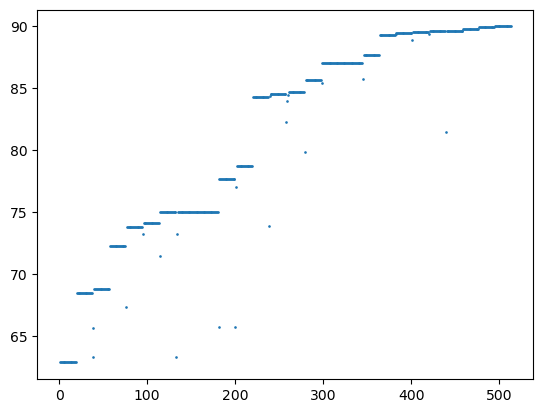

In [6]:
import matplotlib.pyplot as plt

plt.scatter(np.linspace(1,len(flutter_collect),len(flutter_collect)), flutter_collect,s=0.8)

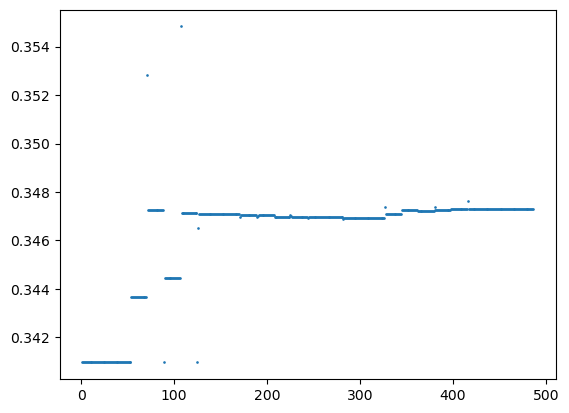

In [7]:
plt.scatter(np.linspace(1,len(mass_collect),len(mass_collect)), mass_collect,s=0.8)